# Hands-On

Você foi designado para realizar a limpeza e preparação de dados de dois conjuntos de dados (base1.csv e base2.csv) distintos que representam informações relacionadas a risco de crédito.

Seu objetivo é ler os dois conjuntos de dados usando a biblioteca Pandas, realizar a concatenação dos dados, lidar com valores duplicados e faltantes, além de verificar a presença de outliers nos dados combinados.

____

## Passos a serem seguidos:

1. **Leitura dos Arquivos:** Utilize a biblioteca Pandas para ler os dois arquivos de dados: 'base1.csv' e 'base2.csv', que estão no diretório datasets, no repositório do módulo.
2. **Concatenação dos Dados:** Concatene os dois conjuntos de dados em um único DataFrame, verificando se os dados possuem a mesma estrutura para uma concatenação adequada.
3. **Tratamento de Dados Duplicados:** Verifique se há linhas duplicadas no DataFrame combinado e remova-as, mantendo a primeira ocorrência.
4. **Tratamento de Valores Faltantes:** Identifique e lide com os valores faltantes no DataFrame combinado. Preencha os valores ausentes com estratégias apropriadas (média, mediana, valor específico etc.) dependendo do contexto dos dados.
5. **Verificação de Outliers:** Utilize métodos estatísticos ou gráficos (como boxplots) para identificar a presença de outliers nos dados. Considere se eles são significativos para a análise ou se precisam ser tratados de alguma forma.

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt

In [0]:
#parte 1
df_base1 = pd.read_csv('/Workspace/Repos/ksantos@unimedcampinas.com.br/ADA_classes/DS-PY-Data-Science/DS-PY-004 TÉCNICAS DE PROGRAMAÇÃO I (PY)/Material do Aluno/datasets/base1.csv')
df_base2 = pd.read_csv('/Workspace/Repos/ksantos@unimedcampinas.com.br/ADA_classes/DS-PY-Data-Science/DS-PY-004 TÉCNICAS DE PROGRAMAÇÃO I (PY)/Material do Aluno/datasets/base2.csv')

df_base1.info()
df_base2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0.1      670 non-null    int64 
 1   Unnamed: 0        670 non-null    int64 
 2   Age               670 non-null    int64 
 3   Sex               670 non-null    object
 4   Job               670 non-null    int64 
 5   Housing           670 non-null    object
 6   Saving accounts   547 non-null    object
 7   Checking account  409 non-null    object
 8   Credit amount     670 non-null    int64 
 9   Duration          670 non-null    int64 
 10  Purpose           670 non-null    object
 11  Risk              670 non-null    object
dtypes: int64(6), object(6)
memory usage: 62.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0 

In [0]:
#parte 2
base_concat = pd.concat([df_base1,df_base2])

In [0]:
#parte3
base_concat_nao_duplica = base_concat[~base_concat.duplicated()]

In [0]:
#parte 4
base_concat_nao_duplica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 329
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0.1      1000 non-null   int64 
 1   Unnamed: 0        1000 non-null   int64 
 2   Age               1000 non-null   int64 
 3   Sex               1000 non-null   object
 4   Job               1000 non-null   int64 
 5   Housing           1000 non-null   object
 6   Saving accounts   817 non-null    object
 7   Checking account  606 non-null    object
 8   Credit amount     1000 non-null   int64 
 9   Duration          1000 non-null   int64 
 10  Purpose           1000 non-null   object
 11  Risk              1000 non-null   object
dtypes: int64(6), object(6)
memory usage: 101.6+ KB


In [0]:
base_concat_nao_duplica

,Unnamed: 0.1,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,104,104,26,male,2,rent,NaN,NaN,2445,12,car,good
1,360,360,61,male,2,free,NaN,moderate,1239,18,education,good
2,695,695,50,male,2,rent,quite rich,NaN,1236,6,car,good
3,902,902,42,male,2,free,NaN,NaN,10477,36,car,good
4,312,312,26,female,2,own,little,rich,3749,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...,...,...
325,467,467,32,male,2,own,NaN,NaN,7238,48,radio/TV,good
326,829,829,38,male,2,free,NaN,moderate,6681,48,business,good
327,296,296,20,female,2,rent,NaN,NaN,4675,12,car,good
328,235,235,30,male,3,own,little,little,1823,24,radio/TV,bad


In [0]:
base_concat_nao_duplica['Saving accounts'].fillna('Não informado',inplace=True)
base_concat_nao_duplica['Checking account'].fillna('Não informado', inplace=True)

In [0]:
base_concat_nao_duplica

,Unnamed: 0.1,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,104,104,26,male,2,rent,Não informado,Não informado,2445,12,car,good
1,360,360,61,male,2,free,Não informado,moderate,1239,18,education,good
2,695,695,50,male,2,rent,quite rich,Não informado,1236,6,car,good
3,902,902,42,male,2,free,Não informado,Não informado,10477,36,car,good
4,312,312,26,female,2,own,little,rich,3749,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...,...,...
325,467,467,32,male,2,own,Não informado,Não informado,7238,48,radio/TV,good
326,829,829,38,male,2,free,Não informado,moderate,6681,48,business,good
327,296,296,20,female,2,rent,Não informado,Não informado,4675,12,car,good
328,235,235,30,male,3,own,little,little,1823,24,radio/TV,bad


In [0]:
#parte 5


In [0]:
import matplotlib.pyplot as plt

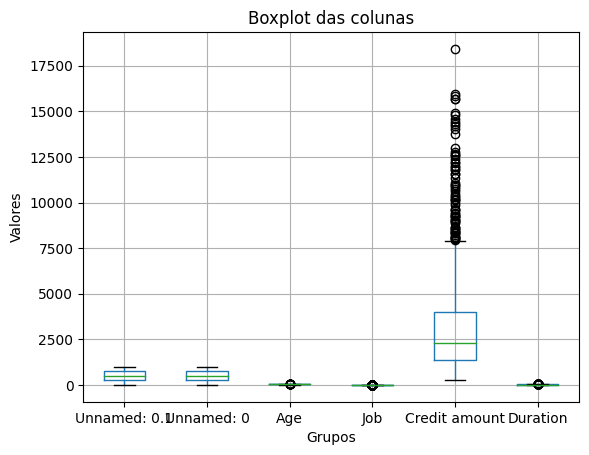

In [0]:
base_concat_nao_duplica.boxplot()
plt.title('Boxplot das colunas')
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.show()

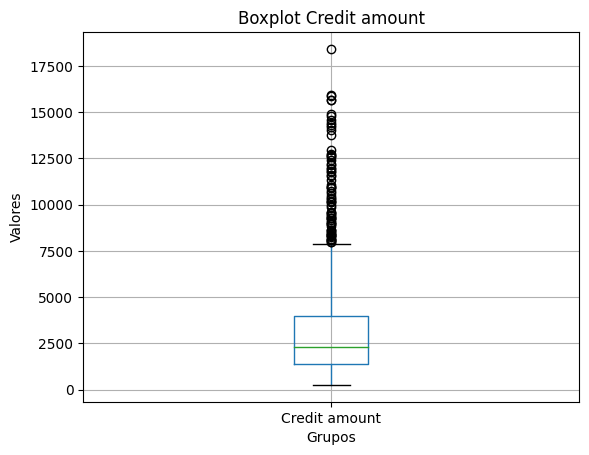

In [0]:

base_concat_nao_duplica.boxplot('Credit amount')
plt.title('Boxplot Credit amount')
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.show()

In [0]:
def identificar_outliers(df, coluna):
    # Calculando o primeiro e terceiro quartis
    Q1 = df[coluna].quantile(0.25) #Primeiro Quartil
    Q3 = df[coluna].quantile(0.75) #Terceiro Quartil
   
    # Calculando o IQR (Intervalo Interquartil)
    IQR = Q3 - Q1
   
    # Calculando os limites superior e inferior para identificar os outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

In [0]:
outliers_encontrados = identificar_outliers(base_concat_nao_duplica,'Credit amount')